# VTuber Channel, Chat and Superchat Statistics Analysis

## Notebook and Data Preparation

In [1]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Creating file paths for each available .csv file
channels_csv = Path("raw_data/channels.csv")
chat_csv = Path("raw_data/chat_stats.csv")
superchat_csv = Path("raw_data/superchat_stats.csv")

# Creating DataFrames for each available .csv file
channels = pd.read_csv(channels_csv)
chat = pd.read_csv(chat_csv)
superchat = pd.read_csv(superchat_csv)

In [3]:
# Initial count to check for null values
channels.count()

channelId            1358
name                 1358
englishName          1358
affiliation          1358
group                 429
subscriptionCount    1358
videoCount           1358
photo                1358
dtype: int64

In [4]:
chat.count()

channelId         12468
period            12468
chats             12468
memberChats       12468
uniqueChatters    12468
uniqueMembers     12468
bannedChatters    12468
deletedChats      12468
dtype: int64

In [5]:
superchat.count()

channelId               10942
period                  10942
superChats              10942
uniqueSuperChatters     10942
totalSC                 10942
averageSC               10942
totalMessageLength      10942
averageMessageLength    10942
mostFrequentCurrency    10942
mostFrequentColor       10942
dtype: int64

In [6]:
# Seems like there are some null values in the group column of the channels DataFrame...
# In addition, this dataset seems to be not current (for example, Hololive now has a new EN generation named Advent).
# Upon further searching, this dataset was found to be last updated in 2022.
channels["group"].unique()

array([nan, 'CyberLive', 'Generation1', 'Generation2', 'Generation3',
       'Official', 'Phase Connect', 'TAMAKI', 'Gen 1', 'Wave 1', 'Gamers',
       'Gen 2', 'SEEDS', 'Wave 2', 'Wave 2019', 'Generation4',
       'Wave 2020', 'ID', 'Wave 2021', 'HIYOCRO', 'Wave 2022',
       'VOLTACTION', 'AniMare', 'HoneyStrap', 'SugarLyric', 'Tsunderia',
       'VApArt', 'First Phase', 'JP Gen 1', 'Phase Invaders', '2nd Phase',
       'Nijisanji EN', 'JP 候補生', 'Nijisanji ID', 'Nijisanji KR',
       'VirtuaReal (CN)', 'Collab', 'Generation 0', '1st Generation',
       'Generation 2', '2nd Generation', 'GAMERS', 'Generation 3',
       '3rd Generation', '4th Generation', '5th Generation',
       '6th Generation (HoloX)', 'English (Myth)', 'English (CouncilRyS)',
       'Kaibutsu', 'Indonesia 1st Gen', 'Indonesia 2nd Gen',
       'Indonesia 3rd Gen', 'Holostars 1st Gen', 'Holostars 2nd Gen',
       'Holostars 3rd Gen', 'Holostars UPROAR', 'Holostars English',
       'Shinengumi', 'mocora', 'Misc', 'INA

In [7]:
# As these VTubers are just not affiliated with any group/generation, let's replace NaN with
# a more descriptive name.
channels["group"] = channels["group"].fillna("No Specific Group/Generation")

In [8]:
channels["group"].unique()

array(['No Specific Group/Generation', 'CyberLive', 'Generation1',
       'Generation2', 'Generation3', 'Official', 'Phase Connect',
       'TAMAKI', 'Gen 1', 'Wave 1', 'Gamers', 'Gen 2', 'SEEDS', 'Wave 2',
       'Wave 2019', 'Generation4', 'Wave 2020', 'ID', 'Wave 2021',
       'HIYOCRO', 'Wave 2022', 'VOLTACTION', 'AniMare', 'HoneyStrap',
       'SugarLyric', 'Tsunderia', 'VApArt', 'First Phase', 'JP Gen 1',
       'Phase Invaders', '2nd Phase', 'Nijisanji EN', 'JP 候補生',
       'Nijisanji ID', 'Nijisanji KR', 'VirtuaReal (CN)', 'Collab',
       'Generation 0', '1st Generation', 'Generation 2', '2nd Generation',
       'GAMERS', 'Generation 3', '3rd Generation', '4th Generation',
       '5th Generation', '6th Generation (HoloX)', 'English (Myth)',
       'English (CouncilRyS)', 'Kaibutsu', 'Indonesia 1st Gen',
       'Indonesia 2nd Gen', 'Indonesia 3rd Gen', 'Holostars 1st Gen',
       'Holostars 2nd Gen', 'Holostars 3rd Gen', 'Holostars UPROAR',
       'Holostars English', 'Shinengu

In [9]:
# Rechecking channels DataFrame
channels.count()

channelId            1358
name                 1358
englishName          1358
affiliation          1358
group                1358
subscriptionCount    1358
videoCount           1358
photo                1358
dtype: int64

In [10]:
channels.head(10)

# Noticed how Tokino Sora is labeled as 'No Specific Group/Generation' when she is part of Generation 0.

,channelId,name,englishName,affiliation,group,subscriptionCount,videoCount,photo
0,UCJFZiqLMntJufDCHc6bQixg,hololive ホロライブ - VTuber Group,Hololive VTuber Group,Hololive,No Specific Group/Generation,1790000,509,https://yt3.ggpht.com/ytc/AMLnZu-FamPA8ofQShmC...
1,UCfrWoRGlawPQDQxxeIDRP0Q,hololive Indonesia,Hololive Indonesia,Hololive,No Specific Group/Generation,339000,69,https://yt3.ggpht.com/ytc/AMLnZu8aac2EJS9DCkeC...
2,UCotXwY6s8pWmuWd_snKYjhg,hololive English,Hololive English,Hololive,No Specific Group/Generation,516000,34,https://yt3.ggpht.com/ytc/AMLnZu8qlq9NWNSS3MkV...
3,UCWsfcksUUpoEvhia0_ut0bA,holostars ホロスターズ - VTuber Group,Holostars Official,Hololive,No Specific Group/Generation,193000,150,https://yt3.ggpht.com/5Jn_OHkOZhZssXXwWopUQZVw...
4,UCp6993wxpyDPHUpavwDFqgg,SoraCh. ときのそらチャンネル,Tokino Sora,Hololive,No Specific Group/Generation,1000000,667,https://yt3.ggpht.com/ytc/AMLnZu-Uc3gukr4oNSY0...
5,UCutuOO0MBRhlvUclzFMaO0g,CyberLive,CyberLive,Aetheria,CyberLive,3720,7,https://yt3.ggpht.com/LrjqdW8QJvtY7F_rlvll6YQZ...
6,UC2hWFlqMew61Jy6A8zu5HzQ,Iku Hoshifuri / 星降いく [PRISM Project],Hoshifuri Iku,PRISM,Generation1,50000,432,https://yt3.ggpht.com/ytc/AMLnZu8OVeXdI4KbZw31...
7,UCRWF6QSuklmwY3UJHyVTQ1w,Aoi Tokimori / 時守あおい [PRISM Project],Tokimori Aoi,PRISM,Generation1,21900,338,https://yt3.ggpht.com/ytc/AMLnZu8N4sqA154aEEYc...
8,UCZfQRuwSLty74QAj55BaKlA,Meno Ibuki / 伊吹めの [PRISM Project],Ibuki Meno,PRISM,Generation1,18200,489,https://yt3.ggpht.com/ytc/AMLnZu9Km0pT2Buq2QeR...
9,UCBJFsaCvgBa1a9BnEaxu97Q,Rita Kamishiro / 神代りた [PRISM Project],Kamishiro Rita,PRISM,Generation2,26300,380,https://yt3.ggpht.com/ytc/AMLnZu8yySmwIEBxHP7N...


In [11]:
chat.head(5)

,channelId,period,chats,memberChats,uniqueChatters,uniqueMembers,bannedChatters,deletedChats
0,UC--A2dwZW7-M2kID0N6_lfA,2021-03,32116,7874,1112,141,1,6
1,UC-hM6YJuNYVAmUWxeIr9FeA,2021-03,1569241,378133,60399,4959,650,2243
2,UC-o-E6I3IC2q8sAoAuM6Umg,2021-03,220362,25920,13101,307,79,23
3,UC01gb86Qdlkh23Nqk3A1OLQ,2021-03,30686,12753,1082,130,15,30
4,UC0Owc36U9lOyi9Gx9Ic-4qg,2021-03,446411,178018,7413,710,8,29


In [12]:
superchat.head(5)

,channelId,period,superChats,uniqueSuperChatters,totalSC,averageSC,totalMessageLength,averageMessageLength,mostFrequentCurrency,mostFrequentColor
0,UCFKOVgVbGmX65RxO3EtH3iw,2021-03,5552,1043,3482098,627,182687,35,JPY,green
1,UCV5ZZlLjk5MKGg3L0n0vbzw,2021-03,220,121,199004,904,5747,29,JPY,green
2,UCvaTdHTWBGv3MKj3KVqJVCw,2021-03,2653,796,1576726,594,64393,26,JPY,green
3,UCNVEsYbiZjH5QLmGeSgTSzg,2021-03,166,124,205611,1238,4853,35,USD,green
4,UCl_gCybOJRIgOXw6Qb4qJzQ,2021-03,3468,835,3773715,1088,110789,34,JPY,green


## Top 10 VTubers for each Affiliation by Subscription

In [13]:
# Listing out all available affiliations
channels["affiliation"].unique()

array(['Hololive', 'Aetheria', 'PRISM', 'Nijisanji', 'Phase Connect',
       'Nori Pro', 'MAHA5', '774inc', 'Tsunderia', 'Independents',
       '.LIVE', 'Emoechi', 'VOMS', 'Axel-V', 'ReAcT', 'Atelier Live',
       'Chukorara', 'Unreal Night Girls', 'Production Kawaii', 'WACTOR',
       'GuildCQ', 'Twitch Independents', 'Hoshimeguri Gakuen', 'AkioAIR',
       'VShojo', 'Polygon', 'Cloud Horizon', 'KEMOMIMI REFLE',
       'Pink Punk Pro', 'SquareLive', 'La Peche Party', 'KAMITSUBAKI',
       'H.Live', 'ReMemories', 'ProPro', 'Masquerade', 'Kizuna Ai Inc.',
       'Yume Reality', 'VSpo', 'NIJIGEN', 'Riot Music', 'Snacknili',
       'Aogiri Highschool', 'Shinsougumi', 'Neo-Porte', "X enc'ount",
       'Marbl_s', 'Kemono Friends', 'Eilene Family', 'idol Corp', 'ViViD',
       'V Dimension.Creators', 'MyHolo TV', 'Pixela Project',
       'WAK Entertainment', 'KAWAII MUSIC', 'Iridori', 'VOICE-ORE',
       'Sleep Monster', 'Yuni Create'], dtype=object)

In [14]:
# Creating list of affiliations for iteration
aff = list(channels["affiliation"].unique())
print(aff)

['Hololive', 'Aetheria', 'PRISM', 'Nijisanji', 'Phase Connect', 'Nori Pro', 'MAHA5', '774inc', 'Tsunderia', 'Independents', '.LIVE', 'Emoechi', 'VOMS', 'Axel-V', 'ReAcT', 'Atelier Live', 'Chukorara', 'Unreal Night Girls', 'Production Kawaii', 'WACTOR', 'GuildCQ', 'Twitch Independents', 'Hoshimeguri Gakuen', 'AkioAIR', 'VShojo', 'Polygon', 'Cloud Horizon', 'KEMOMIMI REFLE', 'Pink Punk Pro', 'SquareLive', 'La Peche Party', 'KAMITSUBAKI', 'H.Live', 'ReMemories', 'ProPro', 'Masquerade', 'Kizuna Ai Inc.', 'Yume Reality', 'VSpo', 'NIJIGEN', 'Riot Music', 'Snacknili', 'Aogiri Highschool', 'Shinsougumi', 'Neo-Porte', "X enc'ount", 'Marbl_s', 'Kemono Friends', 'Eilene Family', 'idol Corp', 'ViViD', 'V Dimension.Creators', 'MyHolo TV', 'Pixela Project', 'WAK Entertainment', 'KAWAII MUSIC', 'Iridori', 'VOICE-ORE', 'Sleep Monster', 'Yuni Create']


In [15]:
# For every affiliation...
for a in aff:
    # Make a DataFrame containing all VTubers in a specific affiliation...
    ch = channels.loc[channels["affiliation"] == a]
    ch_clean = ch[["englishName", "subscriptionCount"]]
    ch_clean = ch_clean.rename(columns={"englishName": "Channel", "subscriptionCount": "No. of Subscribers"})

    # Then sort that DataFrame to have the VTuber with the most subscribers on top and vice versa...
    ch_sort = ch_clean.sort_values("No. of Subscribers", ascending=False)
    ch_sort = ch_sort.reset_index(drop=True)

    # Finally, print the DataFrame alongside affiliation for clear understanding.
    print(f'Affiliation: {a}')
    print(ch_sort.head(10))
    print("---")

Affiliation: Hololive
                 Channel  No. of Subscribers
0              Gawr Gura             4100000
1          Mori Calliope             2110000
2         Houshou Marine             2020000
3           Usada Pekora             1990000
4       Shirakami Fubuki             1920000
5         Inugami Korone             1850000
6  Hololive VTuber Group             1790000
7          Watson Amelia             1690000
8            Minato Aqua             1660000
9           Uruha Rushia             1600000
---
Affiliation: Aetheria
                               Channel  No. of Subscribers
0           Oumiya Emma Ch. [AETHERIA]               63800
1                  Kurohana Inori Ch.                24200
2                Menace Ch. [AETHERIA]               22000
3        Momozora Seina Ch. [AETHERIA]               13200
4  Utano Pandora Ch. 歌乃パンドラ [AETHERIA]               10100
5       Iekushi Chapipi Ch. [AETHERIA]                8170
6            Inami Yoki Ch. [AETHERIA]      

## Top 5 VTubers for each combination of Affiliation and Group
Focusing on Hololive and Nijisanji, the two most famous corporate VTuber affiliates.

In [16]:
# Editing table to assign the following VTubers as Generation 0 as they are wrongly assigned initially:
# Tokino Sora, Roboco-san, Sakura Miko, Hoshimachi Suisei and AZKi

gen_zero = ["Tokino Sora", "Roboco-san", "Sakura Miko", "Hoshimachi Suisei", "AZKi"]

for vt in gen_zero:
    channels.loc[channels["englishName"] == vt, "group"] = "Generation 0"

In [17]:
# Adding focus affiliates into list for iteration
focus = ["Hololive", "Nijisanji"]

In [18]:
# For each affiliate being focused on...
for f in focus:
    # Create a DataFrame containing all VTubers affiliated...
    ch = channels.loc[channels["affiliation"] == f]
    ch_clean = ch[["englishName", "group", "subscriptionCount"]]

    # Then, extract all unique groups available in the affiliation for further iteration...
    group_list = list(ch_clean["group"].unique())

    # For each unique group...
    for group in group_list:
        # Create a DataFrame containing all VTubers in the chosen group
        gr = ch_clean.loc[ch["group"] == group]
        gr = gr.rename(columns={"englishName": "Channel", "group": "Generation/Group", "subscriptionCount": "No. of Subscribers"})

        # Then sort that DataFrame to have the VTuber with the most subscribers on top and vice versa...
        gr_sort = gr.sort_values("No. of Subscribers", ascending=False)
        gr_sort = gr_sort.drop(columns=["Generation/Group"])
        gr_sort = gr_sort.reset_index(drop=True)

        # Finally, print the DataFrame alongside affiliation and group for clear understanding.
        print(f'Affiliation: {f} || Group: {group}')
        print(gr_sort.head(5))
        print("---")

Affiliation: Hololive || Group: No Specific Group/Generation
                 Channel  No. of Subscribers
0  Hololive VTuber Group             1790000
1       Hololive English              516000
2     Hololive Indonesia              339000
3                  YAGOO              205000
4     Holostars Official              193000
---
Affiliation: Hololive || Group: Generation 0
             Channel  No. of Subscribers
0  Hoshimachi Suisei             1540000
1        Sakura Miko             1520000
2        Tokino Sora             1000000
3         Roboco-san              851000
4               AZKi              661000
---
Affiliation: Hololive || Group: 1st Generation
            Channel  No. of Subscribers
0  Shirakami Fubuki             1920000
1        Akai Haato             1370000
2  Natsuiro Matsuri             1270000
3        Yozora Mel              742000
4     Aki Rosenthal              694000
---
Affiliation: Hololive || Group: 2nd Generation
          Channel  No. of Subscr

## VTuber Community Interactions over Time
Focusing on Hoshimachi Suisei and Minato Aqua, because as of 2020 they were the most popular amongst their respective generations.

### Hoshimachi Suisei

In [21]:
# Copying channel DataFrame and cleaning it up for merge
# Doing this first as this DataFrame can be used for the other VTubers
ch_name = channels[["channelId", "englishName"]]
suisei = ch_name.loc[ch_name["englishName"] == "Hoshimachi Suisei"]

suisei

,channelId,englishName
171,UC5CwaMl1eIgY8h02uZw7u8A,Hoshimachi Suisei


In [24]:
# As chats DataFrame features channelID as a foreign key, use key to left-hand merge with suisei DataFrame
suisei_chats = pd.merge(suisei, chat, how="left", on="channelId").reset_index(drop=True)

# This DataFrame now contains Hoshimachi Suisei interaction statistics from March 2021 to July 2022.
suisei_chats

,channelId,englishName,period,chats,memberChats,uniqueChatters,uniqueMembers,bannedChatters,deletedChats
0,UC5CwaMl1eIgY8h02uZw7u8A,Hoshimachi Suisei,2021-03,561249,214885,34685,5248,42,90
1,UC5CwaMl1eIgY8h02uZw7u8A,Hoshimachi Suisei,2021-04,703820,391748,45585,6747,48,42
2,UC5CwaMl1eIgY8h02uZw7u8A,Hoshimachi Suisei,2021-05,612969,393948,35949,6813,8,8
3,UC5CwaMl1eIgY8h02uZw7u8A,Hoshimachi Suisei,2021-06,737133,464666,46608,7756,46,33
4,UC5CwaMl1eIgY8h02uZw7u8A,Hoshimachi Suisei,2021-07,500020,343128,33719,7809,53,5
5,UC5CwaMl1eIgY8h02uZw7u8A,Hoshimachi Suisei,2021-08,679549,452367,35724,7787,15,8
6,UC5CwaMl1eIgY8h02uZw7u8A,Hoshimachi Suisei,2021-09,515852,340786,23182,6598,177,2
7,UC5CwaMl1eIgY8h02uZw7u8A,Hoshimachi Suisei,2021-10,509207,369312,30912,8670,1099,2
8,UC5CwaMl1eIgY8h02uZw7u8A,Hoshimachi Suisei,2021-11,393885,272980,22762,7296,2,0
9,UC5CwaMl1eIgY8h02uZw7u8A,Hoshimachi Suisei,2021-12,537663,430240,26779,9383,4,0


In [40]:
# Creating a new variable to see how many chatters were not members
suisei_chats["nonMemberPercentage"] = ((suisei_chats["uniqueChatters"]-suisei_chats["uniqueMembers"])/suisei_chats["uniqueChatters"]) * 100
suisei_chats["nonMemberPercentage"] = round(suisei_chats["nonMemberPercentage"], 1)

# Also drop bannedChatters and deletedChats due to non-usage
suisei_chats = suisei_chats.drop(columns=["bannedChatters", "deletedChats"])

suisei_chats

,channelId,englishName,period,chats,memberChats,uniqueChatters,uniqueMembers,nonMemberPercentage
0,UC5CwaMl1eIgY8h02uZw7u8A,Hoshimachi Suisei,2021-03,561249,214885,34685,5248,84.9
1,UC5CwaMl1eIgY8h02uZw7u8A,Hoshimachi Suisei,2021-04,703820,391748,45585,6747,85.2
2,UC5CwaMl1eIgY8h02uZw7u8A,Hoshimachi Suisei,2021-05,612969,393948,35949,6813,81.0
3,UC5CwaMl1eIgY8h02uZw7u8A,Hoshimachi Suisei,2021-06,737133,464666,46608,7756,83.4
4,UC5CwaMl1eIgY8h02uZw7u8A,Hoshimachi Suisei,2021-07,500020,343128,33719,7809,76.8
5,UC5CwaMl1eIgY8h02uZw7u8A,Hoshimachi Suisei,2021-08,679549,452367,35724,7787,78.2
6,UC5CwaMl1eIgY8h02uZw7u8A,Hoshimachi Suisei,2021-09,515852,340786,23182,6598,71.5
7,UC5CwaMl1eIgY8h02uZw7u8A,Hoshimachi Suisei,2021-10,509207,369312,30912,8670,72.0
8,UC5CwaMl1eIgY8h02uZw7u8A,Hoshimachi Suisei,2021-11,393885,272980,22762,7296,67.9
9,UC5CwaMl1eIgY8h02uZw7u8A,Hoshimachi Suisei,2021-12,537663,430240,26779,9383,65.0


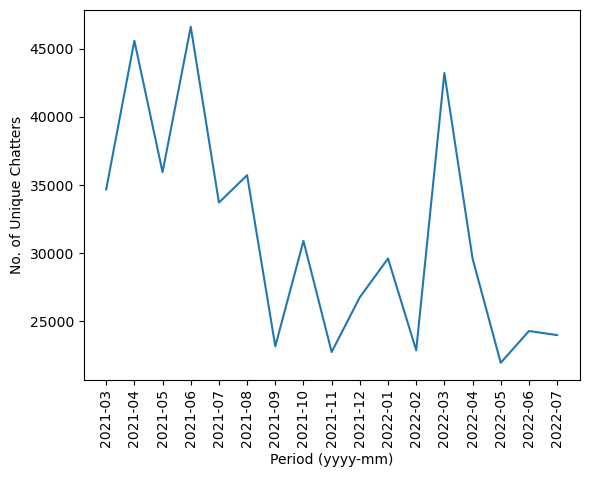

In [31]:
# Plotting number of unique chatters over period
plt.plot(suisei_chats["period"], suisei_chats["uniqueChatters"])
plt.xlabel("Period (yyyy-mm)")
plt.xticks(rotation=90)
plt.ylabel("No. of Unique Chatters")
plt.show()

Seems like Suisei was popular during the months of April 2021, June 2021 and March 2022, with June 2021 being the month with the most traffic to her channel.

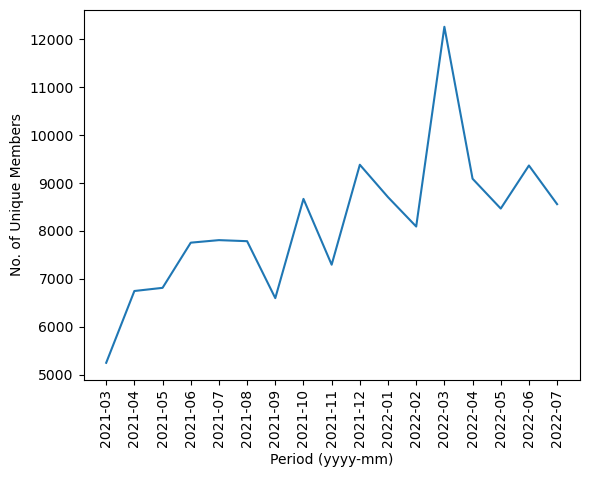

In [33]:
# Plotting number of members over period

# Unlike chatters, members pay for membership, which grants them special perks like
# special emojis, members-only streams, and recognition as a member.
# However, members have to re-register every month to remain a member.

plt.plot(suisei_chats["period"], suisei_chats["uniqueMembers"])
plt.xlabel("Period (yyyy-mm)")
plt.xticks(rotation=90)
plt.ylabel("No. of Unique Members")
plt.show()

Suisei's membership count slowly grew over the months, reaching a peak of over 12 thousand members in March of 2022. However, after that, membership count took a deep dive, resulting in her having over 8 thousand members by July of 2022.

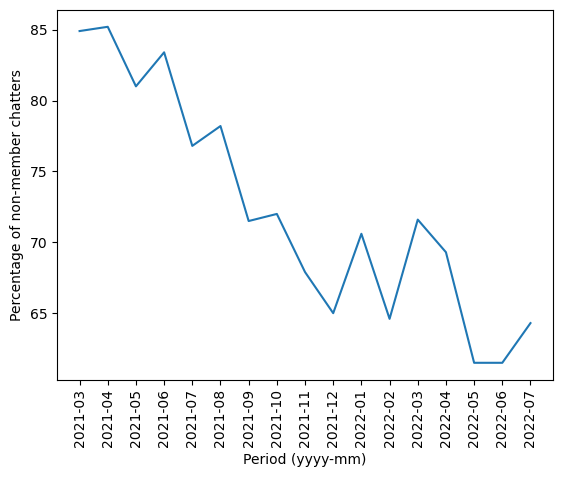

In [37]:
# Plotting percentage of non-member chatters over period
plt.plot(suisei_chats["period"], suisei_chats["nonMemberPercentage"])
plt.xlabel("Period (yyyy-mm)")
plt.xticks(rotation=90)
plt.ylabel("Percentage of non-member chatters")
plt.show()

From this graph, it is obvious that Suisei managed to convert regular chatters to more dedicated members over time. At the beginning, only 15.1% of people who chatted with Suisei and/or fellow watchers were members. However, by June 2022, 38.5% of chatters were members, indicating that Suisei is slowly becoming a successful personality.